Accurate credit risk assessment is vital for financial institutions. This project delves into the application of logistic regression and advanced machine learning techniques to the American Express dataset. Our objective is to determine the optimal model for predicting credit card defaults and to uncover the underlying variables that significantly impact creditworthiness.


Dataset used for this project can be download at: https://www.kaggle.com/datasets/pradip11/amexpert-codelab-2021

The dataset accessed here, belongs to American Express.


We impliment a credit risk analysis project using machine learning **techniques**. The key steps involved are:

**Data Loading:** Reads the American Express dataset.
Exploratory Data Analysis (EDA): Analyzes the data, identifies missing values, and explores relationships between features.
**Data Cleaning:** Handles missing values using appropriate imputation techniques.
**Feature Engineering:** Creates new features and transforms existing ones for better model performance.
**Data Splitting:** Splits the data into training and testing sets.
**Data Scaling:** Scales numerical features to a common range.
**Handling Class Imbalance:** Addresses the imbalance in the target variable using SMOTE.

**Model Building and Evaluation:**

Build Logistic Regression, Decision Tree,Random Forest,CatBoost,XGBoost,LightGBM,K-Nearest Neighbors model.

**Model Evaluation:**

We evaluates the performance of each model using metrics like accuracy, F1-score, and ROC AUC. Identify the best-performing model based on the evaluation metrics.

**Key Findings:**

XGBoost outperforms other models in terms of accuracy, F1-score, and ROC AUC.
Credit score, credit limit utilization, and number of days employed are significant predictors of credit card defaults.
Age is not a significant predictor of defaults.
Conclusion:

The project provides valuable insights into credit risk analysis and demonstrates the effectiveness of machine learning techniques in predicting credit card defaults. Financial institutions can leverage these insights to improve their credit risk assessment models and make informed decisions.

##Imports and Data Loading

In [100]:
 pip install -q imblearn xgboost catboost lightgbm scorecardpy mlxtend

In [101]:
pip install --upgrade pandas

In [102]:
import pandas as pd
import pandas.core.algorithms as algos
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import re
import lightgbm as lgb
import scorecardpy as sc
import mlxtend
import scipy.stats.stats as stats
import traceback
import string

In [103]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

In [104]:
pd.set_option('display.max_columns', None)

In [105]:
pd.set_option('display.max_colwidth', None)

In [106]:
train = pd.read_csv('train.csv')
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [108]:
train["credit_card_default"].value_counts(normalize=True)

,proportion
credit_card_default,
0,0.918797
1,0.081203


In [109]:
df = train.sample(n = 30000, random_state = 42, replace = False)
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
34126,CST_163708,Wachtel,50,F,N,Y,0.0,269502.14,4181.0,Unknown,1.0,0.0,17440.44,36017.45,23,807.0,0,0,0
44609,CST_131305,Deepa,29,F,N,Y,0.0,115795.25,365250.0,Unknown,2.0,0.0,28962.21,21781.38,60,858.0,0,0,0
44264,CST_131350,Jason,39,F,N,Y,0.0,113477.67,365241.0,Unknown,2.0,0.0,27463.96,27485.15,81,667.0,0,0,1
33556,CST_106655,Gilbert Kreijger,35,F,Y,Y,1.0,215555.19,1882.0,Managers,3.0,0.0,47863.75,25054.25,32,690.0,0,0,0
28050,CST_154013,Slater,53,M,Y,Y,0.0,185082.22,365244.0,Unknown,2.0,0.0,47185.73,65186.23,65,721.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37523,CST_113336,Leika Kihara,26,F,N,Y,0.0,95125.83,365244.0,Unknown,1.0,0.0,18408.08,26632.82,2,790.0,0,0,0
36228,CST_151817,Dixon,31,F,N,N,0.0,119277.91,891.0,Laborers,2.0,0.0,18243.68,16150.12,18,791.0,0,0,0
32772,CST_107659,P.J. Huffstutter,50,F,N,N,0.0,214846.93,1740.0,Sales staff,2.0,0.0,16482.42,27253.76,16,709.0,0,0,0
9762,CST_141352,an,25,M,N,Y,0.0,175005.61,653.0,Laborers,2.0,0.0,19366.06,35727.99,9,691.0,0,0,0


# Exploratory Data Analysis
Check the data shape and length using shape attribute, displays information about the data types and number of missing values per feature.  


In [110]:
# check shape and length
print(df.shape)

(30000, 19)


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 34126 to 33325
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              30000 non-null  object 
 1   name                     30000 non-null  object 
 2   age                      30000 non-null  int64  
 3   gender                   30000 non-null  object 
 4   owns_car                 29631 non-null  object 
 5   owns_house               30000 non-null  object 
 6   no_of_children           29498 non-null  float64
 7   net_yearly_income        30000 non-null  float64
 8   no_of_days_employed      29685 non-null  float64
 9   occupation_type          30000 non-null  object 
 10  total_family_members     29944 non-null  float64
 11  migrant_worker           29947 non-null  float64
 12  yearly_debt_payments     29938 non-null  float64
 13  credit_limit             30000 non-null  float64
 14  credit_limit_used(%)   

## Categorical Features & Numerical Features
Separate categorical and numerical features for further analysis, check for duplicate rows and identify missing values for both categorical and numerical features.

In [112]:
categorical_features  = [col for col in df.columns if df[col].dtypes == "object"]
numerical_features  =  [col for col in df.columns if df[col].dtypes != "object"]

print("no of cat feats: ", len(categorical_features ))
print("no of num feats: ", len(numerical_features ))

no of cat feats:  6
no of num feats:  13


In [113]:
categorical_features

['customer_id', 'name', 'gender', 'owns_car', 'owns_house', 'occupation_type']

In [114]:
numerical_features

['age',
 'no_of_children',
 'net_yearly_income',
 'no_of_days_employed',
 'total_family_members',
 'migrant_worker',
 'yearly_debt_payments',
 'credit_limit',
 'credit_limit_used(%)',
 'credit_score',
 'prev_defaults',
 'default_in_last_6months',
 'credit_card_default']

In [115]:
df.duplicated().sum()

0

In [116]:
df.isnull().sum().sort_values(ascending=False).head(10)

,0
no_of_children,502
owns_car,369
no_of_days_employed,315
yearly_debt_payments,62
total_family_members,56
migrant_worker,53
credit_score,6
customer_id,0
default_in_last_6months,0
prev_defaults,0


## View default state variable

In [117]:
df["credit_card_default"].value_counts()

,count
credit_card_default,
0,27537
1,2463


In [118]:
df["credit_card_default"].value_counts(normalize=True)

,proportion
credit_card_default,
0,0.9179
1,0.0821


## Identify missing values (NaNs) in Categorical Features

In [119]:
df[categorical_features ].isnull().sum()

,0
customer_id,0
name,0
gender,0
owns_car,369
owns_house,0
occupation_type,0


In [120]:
for i in categorical_features :
    print("Column Name:",i)
    print(df[i].value_counts(normalize=True))
    print("\n")

Column Name: customer_id
customer_id
CST_163708    0.000033
CST_131964    0.000033
CST_162494    0.000033
CST_138114    0.000033
CST_102185    0.000033
                ...   
CST_148239    0.000033
CST_130171    0.000033
CST_132131    0.000033
CST_112807    0.000033
CST_129867    0.000033
Name: proportion, Length: 30000, dtype: float64


Column Name: name
name
Jonathan            0.004367
Jonathan Stempel    0.004133
Jessica             0.003600
Sarah               0.003533
David               0.003467
                      ...   
Baker Jonathan      0.000033
Joshua Franklin     0.000033
Fathiya Dahrul      0.000033
Becker              0.000033
Olga Dzyubenko      0.000033
Name: proportion, Length: 3514, dtype: float64


Column Name: gender
gender
F      0.657700
M      0.342267
XNA    0.000033
Name: proportion, dtype: float64


Column Name: owns_car
owns_car
N    0.660862
Y    0.339138
Name: proportion, dtype: float64


Column Name: owns_house
owns_house
Y    0.6962
N    0.3038
Name: 

Given that the majority of missing values constitute less than 2% of the dataset, we will employ statistical imputation techniques. Categorical variables will be imputed with their respective modes, and numerical variables will be filled with their corresponding medians.

### Gender

In [121]:
df[df['gender'] == 'XNA']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
28498,CST_144669,ernard,52,XNA,N,Y,2.0,203596.95,2806.0,Low-skill Laborers,4.0,0.0,14700.2,65487.34,40,669.0,0,0,0


In [122]:
# change it to M as the name pronunces as Male
df['gender'] = df['gender'].apply(lambda x: 'M' if x=='XNA' else x)
df['gender'].value_counts()

,count
gender,
F,19731
M,10269


### Fill owns_car with mode of the data

In [123]:
df.fillna({'owns_car': df['owns_car'].mode()[0]}, inplace=True)

In [125]:
df["owns_car"].value_counts(normalize=True)

,proportion
owns_car,
N,0.665033
Y,0.334967


In [126]:
df[categorical_features ].isnull().sum()

,0
customer_id,0
name,0
gender,0
owns_car,0
owns_house,0
occupation_type,0


## Identify missing values (NaNs) in  Numerical features

In [127]:
df[numerical_features ].isnull().sum().sort_values(ascending=False).head(10)

,0
no_of_children,502
no_of_days_employed,315
yearly_debt_payments,62
total_family_members,56
migrant_worker,53
credit_score,6
age,0
net_yearly_income,0
credit_limit,0
credit_limit_used(%),0


### no_of_days_employed

In [128]:
# impute 'no_of_days_employed' with median based on 'occupation_type'
occp_days_employed = df.groupby(by='occupation_type')['no_of_days_employed'].median()

for i in occp_days_employed.index:
    df['no_of_days_employed'] = np.where((df['no_of_days_employed'].isna()) & (df['occupation_type'] == i), occp_days_employed[i], df['no_of_days_employed'])

In [129]:
df.no_of_days_employed.isna().sum()

0

###Impute yearly_debt_payments with median based on credit_card_default

In [130]:
yearDebt_credit = df.groupby(by='credit_card_default')['yearly_debt_payments'].median()
for i in yearDebt_credit.index:
    df['yearly_debt_payments'] = np.where((df['yearly_debt_payments'].isna()) & (df['credit_card_default'] == i), yearDebt_credit[i], df['yearly_debt_payments'])

In [131]:
df['yearly_debt_payments'].isna().sum()

0

In [132]:
df[numerical_features ].isnull().sum().sort_values(ascending = False).head(5)

,0
no_of_children,502
total_family_members,56
migrant_worker,53
credit_score,6
age,0


### migrant_worker

In [133]:
df['migrant_worker'].mode()

,migrant_worker
0,0.0


In [134]:
# imputing with mode of the data
df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)

# check null values count
df['migrant_worker'].isna().sum()

<ipython-input-134-62a677eddd60>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)


0

### total_family_members

In [135]:
# imputing with mode of the data
df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)

# check null values count
df['total_family_members'].isna().sum()

<ipython-input-135-621c7d92bc99>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)


0

In [136]:
df[numerical_features ].isnull().sum().sort_values(ascending = False).head(5)

,0
no_of_children,502
credit_score,6
age,0
net_yearly_income,0
no_of_days_employed,0


### no_of_children

In [137]:
# fill no_of_children with mode of the data
df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace=True)

<ipython-input-137-674b7d9c1271>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace=True)


### credit_score

In [138]:
# check medians of credit_score wrt credit_card_default
cred_score = df.groupby(by='credit_card_default')['credit_score'].median()

for i in cred_score.index:
    df['credit_score'] = np.where((df['credit_score'].isna()) & (df['credit_card_default'] == i), cred_score[i], df['credit_score'])

# check for null values in 'credit_score'
df['credit_score'].isna().sum()

0

In [139]:
df[numerical_features ].isnull().sum().sort_values(ascending = False)

,0
age,0
no_of_children,0
net_yearly_income,0
no_of_days_employed,0
total_family_members,0
migrant_worker,0
yearly_debt_payments,0
credit_limit,0
credit_limit_used(%),0
credit_score,0


In [140]:
df.isnull().sum()

,0
customer_id,0
name,0
age,0
gender,0
owns_car,0
owns_house,0
no_of_children,0
net_yearly_income,0
no_of_days_employed,0
occupation_type,0


#### Ploting Credit_default ratio

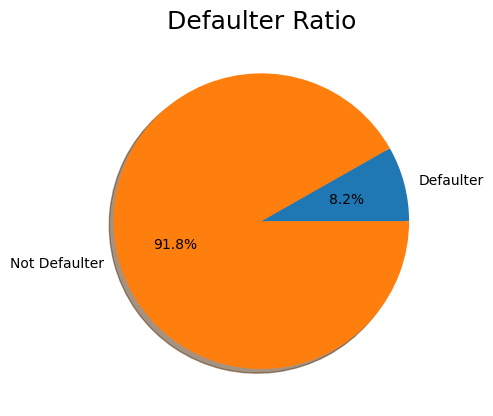

In [199]:
total_default_values = df.credit_card_default.value_counts(ascending=True).values
plt.figure()
plt.pie(total_default_values, labels=['Defaulter', 'Not Defaulter'], autopct='%1.1f%%', shadow=True)
plt.title('Defaulter Ratio', fontsize=18)
plt.show()

###Visualize AGE feature

<Figure size 640x480 with 0 Axes>

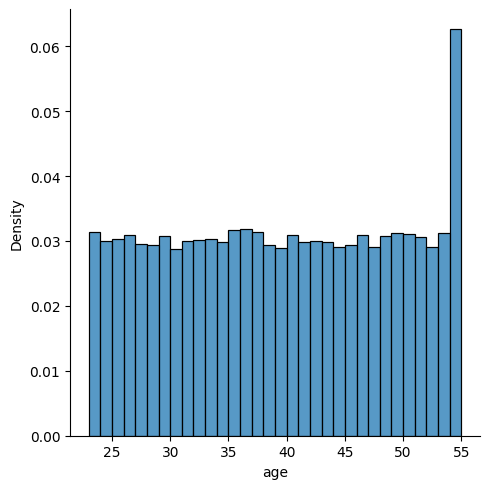

In [142]:
plt.figure()
sns.displot(data=df, x='age', kind='hist', stat='density')
plt.show()

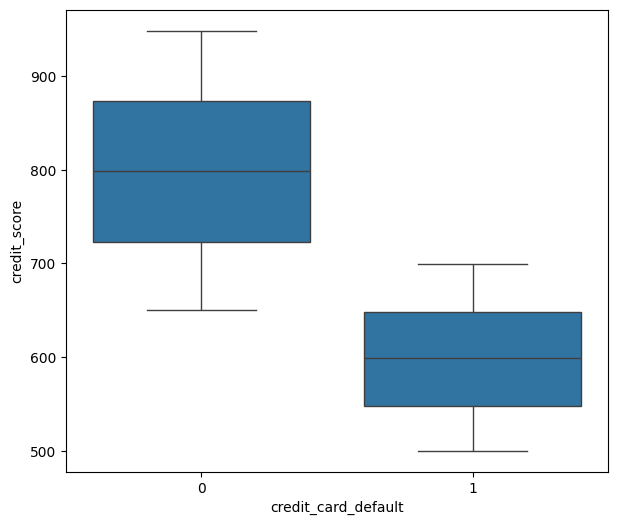

In [143]:
# boxplot of credit_defaulter-credit_score
plt.figure(figsize=[7,6])
#sns.boxplot(df['credit_card_default'], df['credit_score'])
sns.boxplot(x='credit_card_default', y='credit_score', data=df)
plt.show()

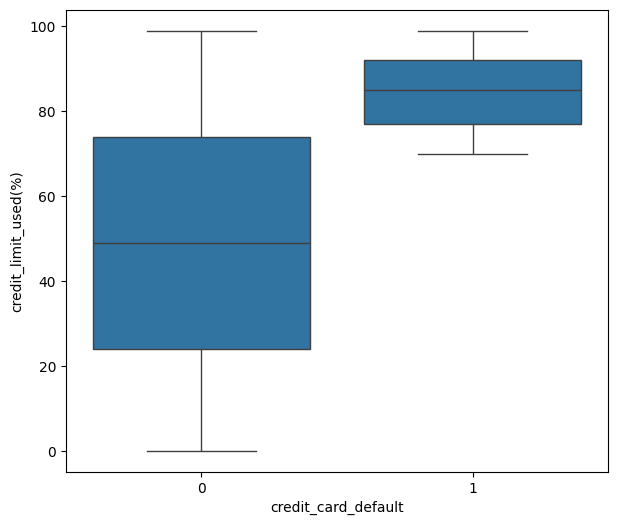

In [144]:
# boxplot of credit_defaulter-credit_limit_utilization
plt.figure(figsize=[7,6])
#sns.boxplot(df['credit_card_default'], df['credit_limit_used(%)'])
sns.boxplot(x='credit_card_default', y='credit_limit_used(%)', data=df)
plt.show()

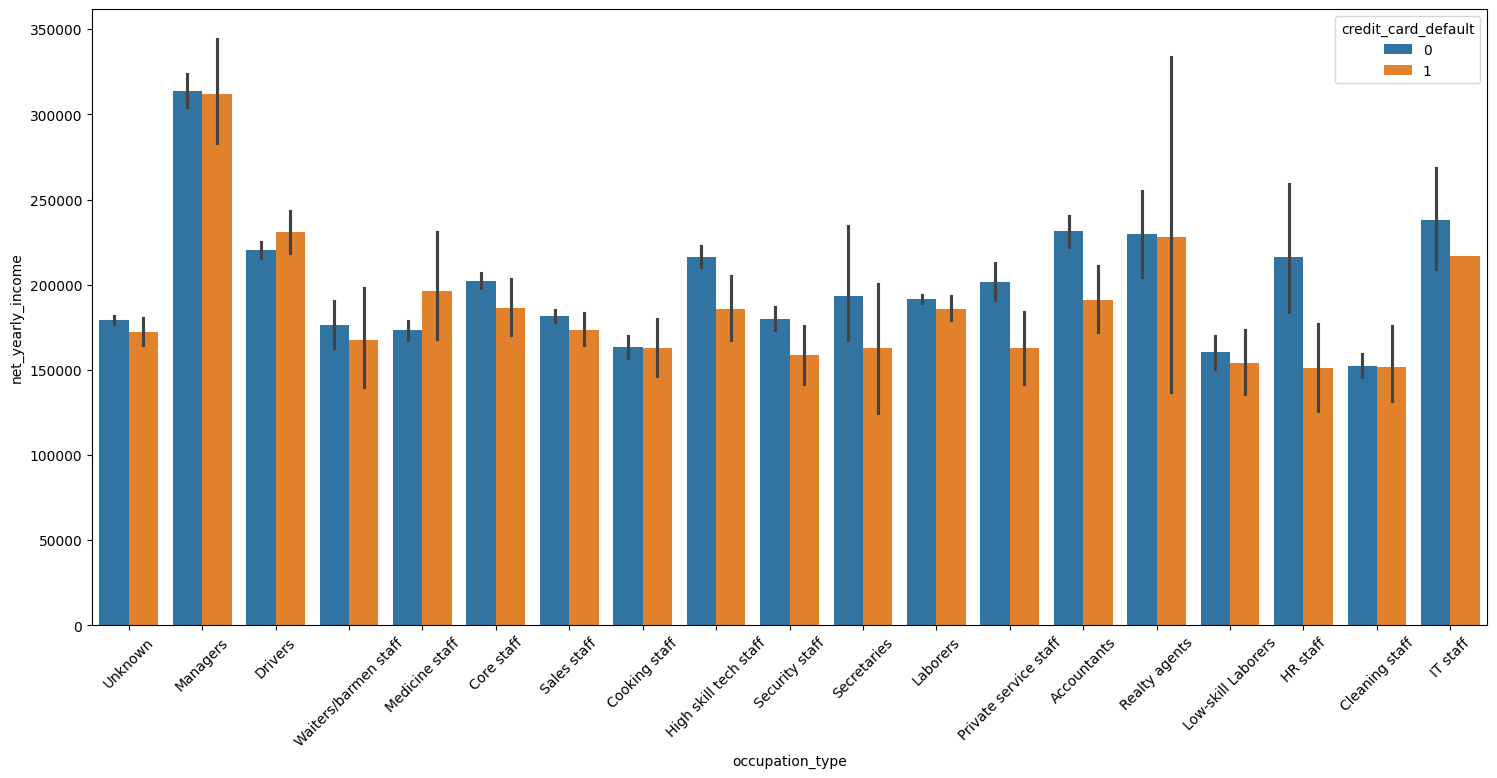

In [145]:
# barplots for occupation types wrt credit_default
plt.figure(figsize=[18,8])
sns.barplot(x=df['occupation_type'], y=df['net_yearly_income'], hue=df['credit_card_default'])
plt.xticks(rotation=45)
plt.show()

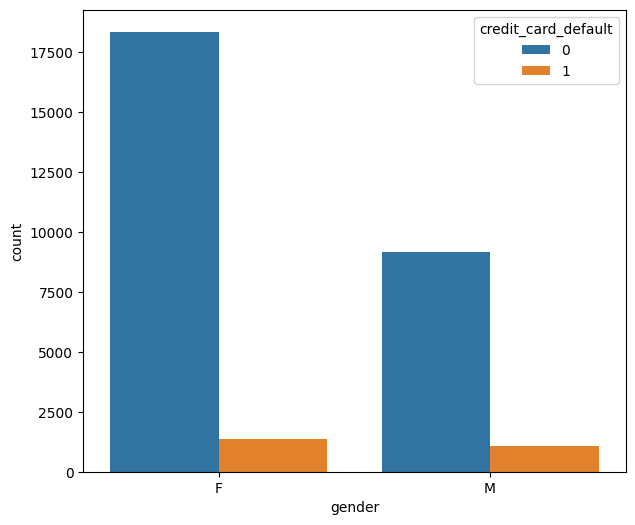

In [146]:
# male or female defaulters
plt.figure(figsize=[7,6])
sns.countplot(x='gender', hue='credit_card_default', data=df)
plt.show()

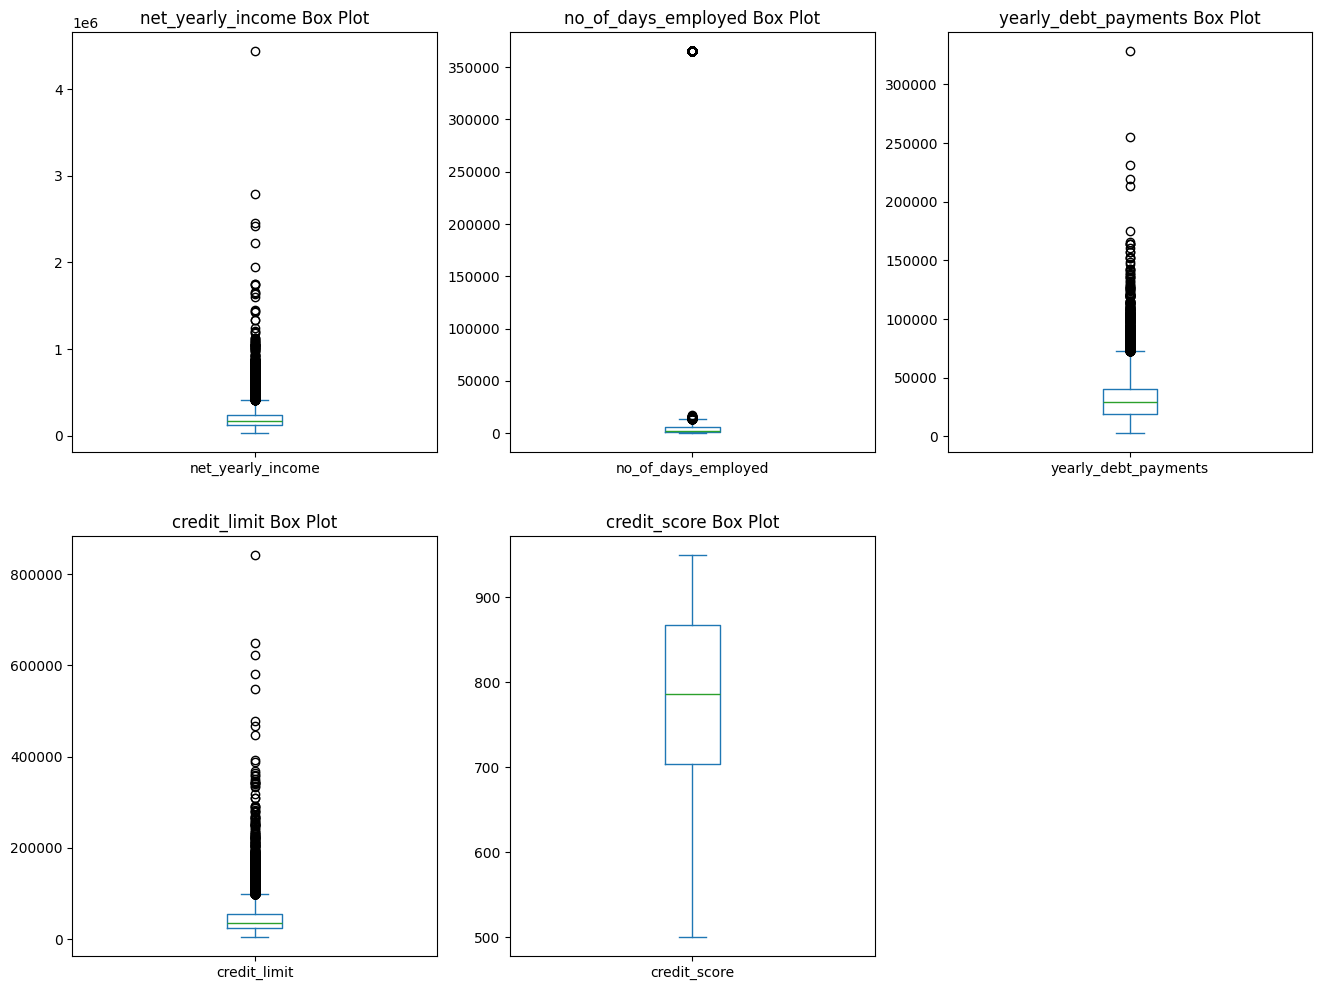

In [147]:
# boxplot of all continuous variables

plt.figure(figsize=[16, 12])
plt.subplot(2,3,1)
df['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
df['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
df['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
df['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
df['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()

# Data Processing

## Drop columns which have Information Value (IV) < 0.02

In [148]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n=max_bin):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X', 'Y']][df1.X.isnull()]
    notmiss = df1[['X', 'Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n, duplicates='drop')})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin
        # Use pd.qcut to generate quantile-based bins, ensuring unique bins
        bins = pd.qcut(notmiss.X, q=n, retbins=True, duplicates='drop')[1]
        # If bins has only 2 elements, add a new bin to make it monotonic
        if len(bins) == 2:
            bins = np.insert(bins, 1, bins[0] + (bins[1] - bins[0]) / 2)
        # Ensure bins are strictly increasing
        # bins = np.sort(np.unique(bins))
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, bins, include_lowest=True, duplicates='drop')})
        d2 = d1.groupby('Bucket', as_index=True)

    d3 = pd.DataFrame({}, index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3 = d3.reset_index(drop=True)

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE': np.nan}, index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = pd.concat([d3, d4], ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT / d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT / d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT / d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT / d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
    #d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()

    return(d3)

def char_bin(Y, X):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    df2 = notmiss.groupby('X',as_index=True)

    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)

    return(d3)


def data_vars(df1, target):

    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]

    x = df1.dtypes.index
    count = -1

    # Create an empty list to store DataFrames
    iv_df_list = []

    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(pd.Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1

            # Append the DataFrame to the list
            iv_df_list.append(conv)

    # Concatenate all DataFrames in the list
    iv_df = pd.concat(iv_df_list, ignore_index=True)

    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [149]:
final_iv, IV = data_vars(df.drop(columns =["customer_id", "name", 'credit_card_default']), df["credit_card_default"])

<ipython-input-148-62adfbd009a6>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index=True)
<ipython-input-148-62adfbd009a6>:14: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
<ipython-input-148-62adfbd009a6>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index=True)
<ipython-input-148-62adfbd009a6>:14: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace;

In [150]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,age,23,34,10835,906,0.083618,9929,0.916382,0.367844,0.360569,0.019975,0.000524
1,age,35,45,9963,794,0.079695,9169,0.920305,0.322371,0.332970,-0.032350,0.000524
2,age,46,55,9202,763,0.082917,8439,0.917083,0.309785,0.306460,0.010789,0.000524
3,gender,F,F,19731,1378,0.069839,18353,0.930161,0.559480,0.666485,-0.175009,0.048503
4,gender,M,M,10269,1085,0.105658,9184,0.894342,0.440520,0.333515,0.278268,0.048503
5,owns_car,N,N,19951,1709,0.085660,18242,0.914340,0.693869,0.662454,0.046332,0.004524
6,owns_car,Y,Y,10049,754,0.075032,9295,0.924968,0.306131,0.337546,-0.097689,0.004524
7,owns_house,N,N,9114,757,0.083059,8357,0.916941,0.307349,0.303483,0.012659,0.000070
8,owns_house,Y,Y,20886,1706,0.081682,19180,0.918318,0.692651,0.696517,-0.005566,0.000070
9,no_of_children,0.0,1.0,27010,2196,0.081303,24814,0.918697,0.891596,0.901115,-0.010620,0.001401


In [151]:
IV.sort_values('IV')

,VAR_NAME,IV
12,owns_house,0.000070
0,age,0.000524
8,no_of_children,0.001401
1,credit_limit,0.002147
14,total_family_members,0.002505
11,owns_car,0.004524
13,prev_defaults,0.006260
7,net_yearly_income,0.008035
15,yearly_debt_payments,0.010765
6,migrant_worker,0.012561


In [152]:
IV.sort_values('IV', ascending=True).head(10)

,VAR_NAME,IV
12,owns_house,0.000070
0,age,0.000524
8,no_of_children,0.001401
1,credit_limit,0.002147
14,total_family_members,0.002505
11,owns_car,0.004524
13,prev_defaults,0.006260
7,net_yearly_income,0.008035
15,yearly_debt_payments,0.010765
6,migrant_worker,0.012561


In [153]:
IV.sort_values('IV', ascending=True).head(10)["VAR_NAME"].values

array(['owns_house', 'age', 'no_of_children', 'credit_limit',
       'total_family_members', 'owns_car', 'prev_defaults',
       'net_yearly_income', 'yearly_debt_payments', 'migrant_worker'],
      dtype=object)

**We will drop some low (< 0.02) IV columns**

In [154]:
low_IV_cols =  ['age', 'owns_house', 'yearly_debt_payments', 'credit_limit',
      'no_of_children', 'total_family_members', 'net_yearly_income',
       'owns_car', 'prev_defaults', 'migrant_worker']

In [155]:
#dt_s = sc.var_filter(df, y="credit_card_default",return_rm_reason=True)

In [156]:
#dt_s["dt"]

## WOE binning
Weight of Evidence (WOE) binning is a technique used in predictive modeling, especially in credit scoring and risk analysis, to transform continuous or categorical variables into a form that captures the relationship between the predictor and the target variable. It helps to prepare features for logistic regression by converting them into a linear format.

[INFO] creating woe binning ...


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is

Binning on 30000 rows and 17 columns in 00:00:30


{'age': <Figure size 640x480 with 2 Axes>,
 'migrant_worker': <Figure size 640x480 with 2 Axes>,
 'credit_limit': <Figure size 640x480 with 2 Axes>,
 'no_of_days_employed': <Figure size 640x480 with 2 Axes>,
 'gender': <Figure size 640x480 with 2 Axes>,
 'yearly_debt_payments': <Figure size 640x480 with 2 Axes>,
 'credit_score': <Figure size 640x480 with 2 Axes>,
 'owns_house': <Figure size 640x480 with 2 Axes>,
 'net_yearly_income': <Figure size 640x480 with 2 Axes>,
 'default_in_last_6months': <Figure size 640x480 with 2 Axes>,
 'credit_limit_used(%)': <Figure size 640x480 with 2 Axes>,
 'owns_car': <Figure size 640x480 with 2 Axes>,
 'prev_defaults': <Figure size 640x480 with 2 Axes>,
 'occupation_type': <Figure size 640x480 with 2 Axes>,
 'no_of_children': <Figure size 640x480 with 2 Axes>,
 'total_family_members': <Figure size 640x480 with 2 Axes>}

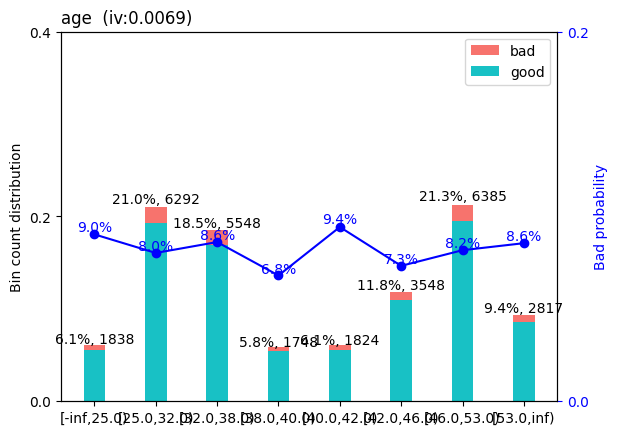

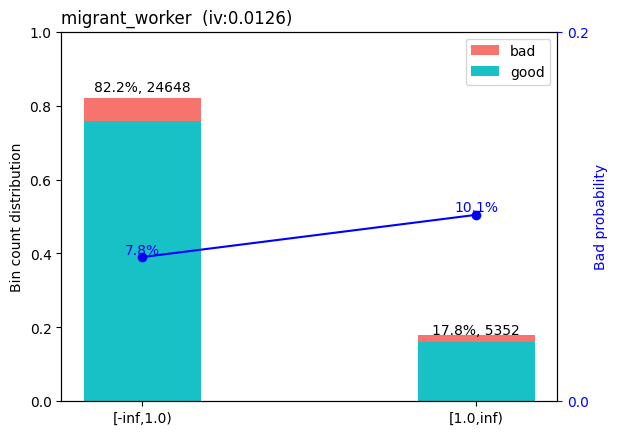

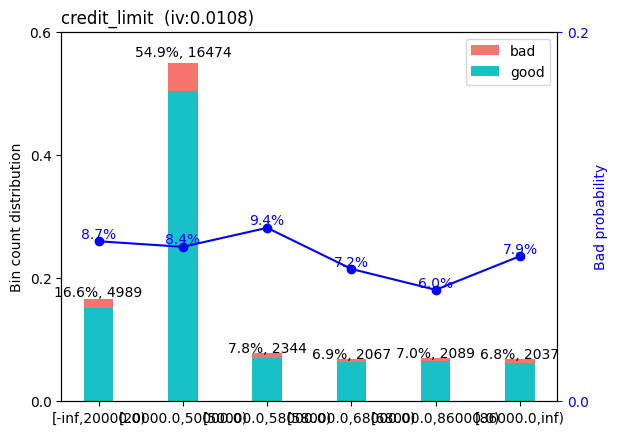

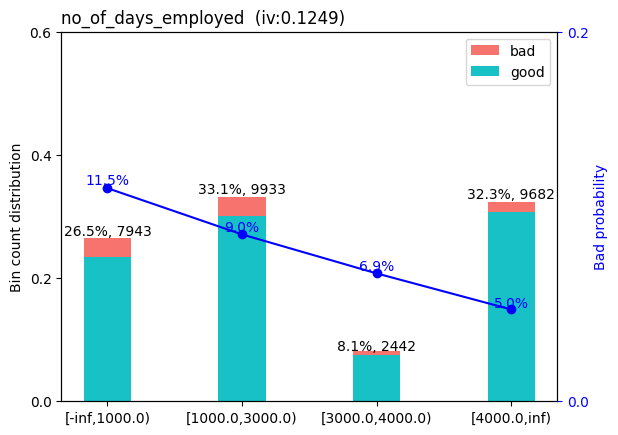

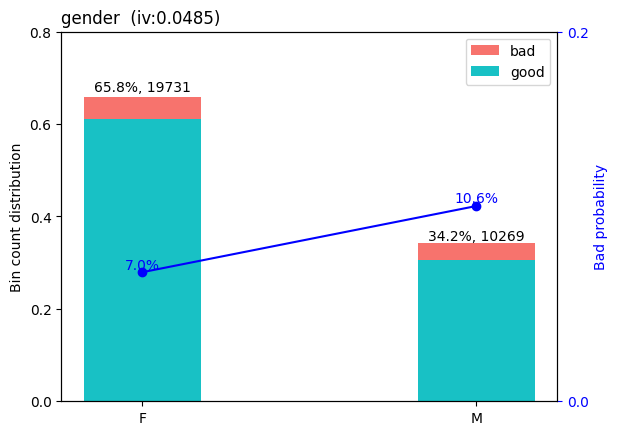

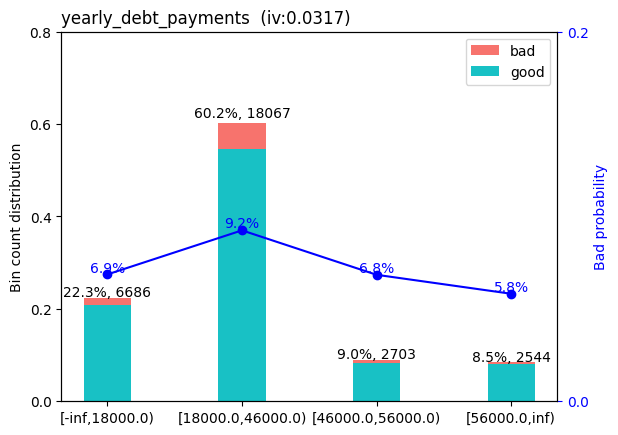

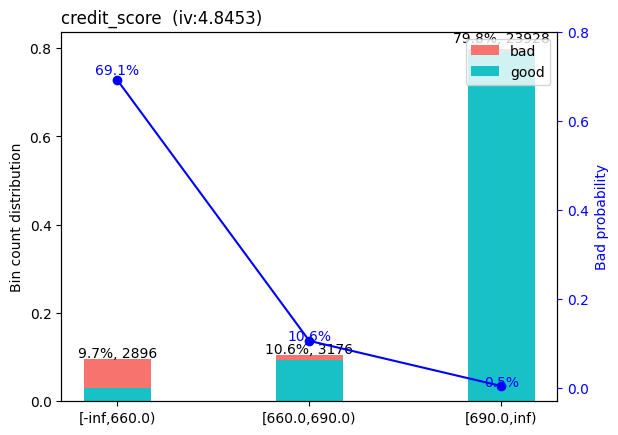

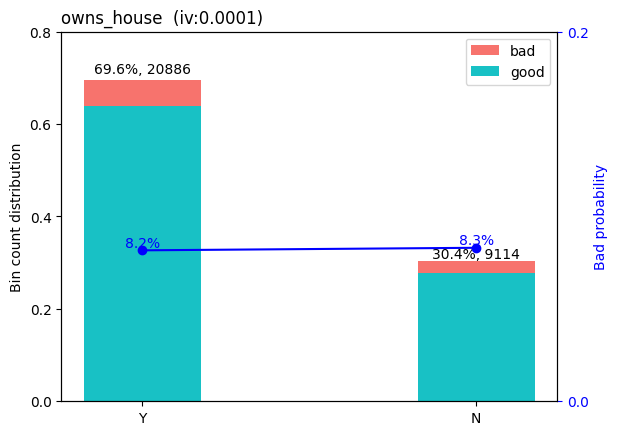

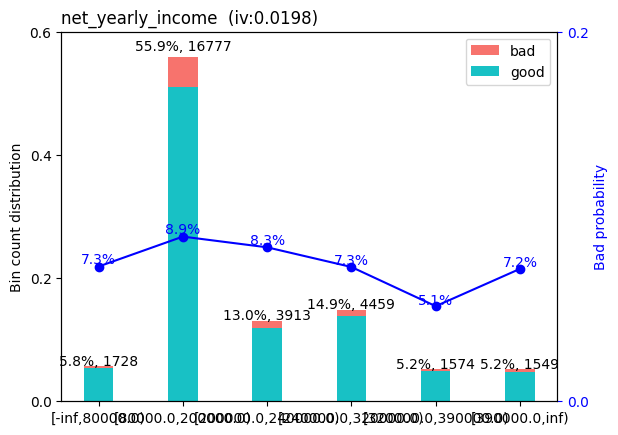

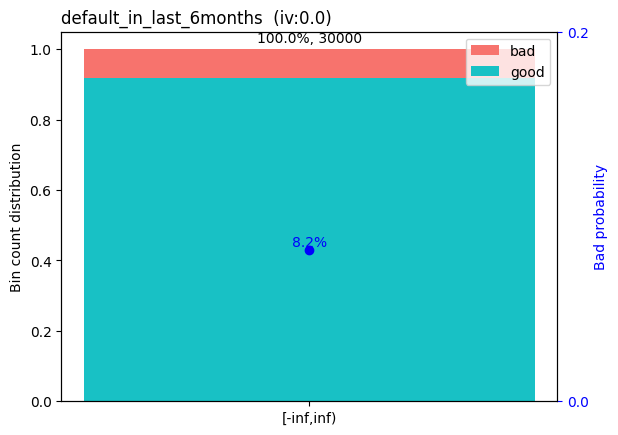

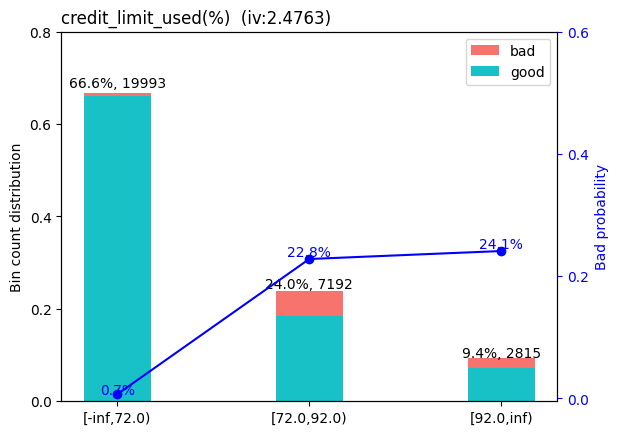

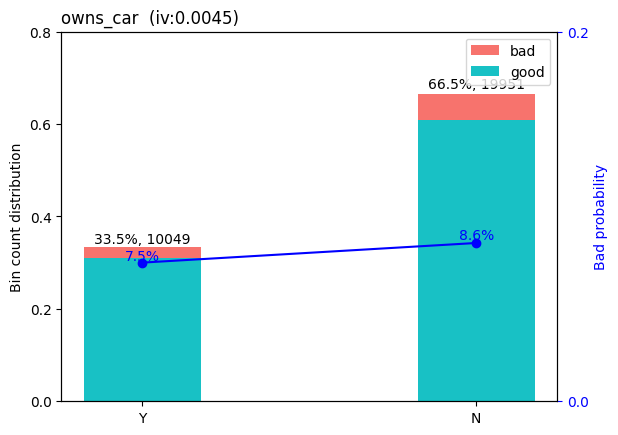

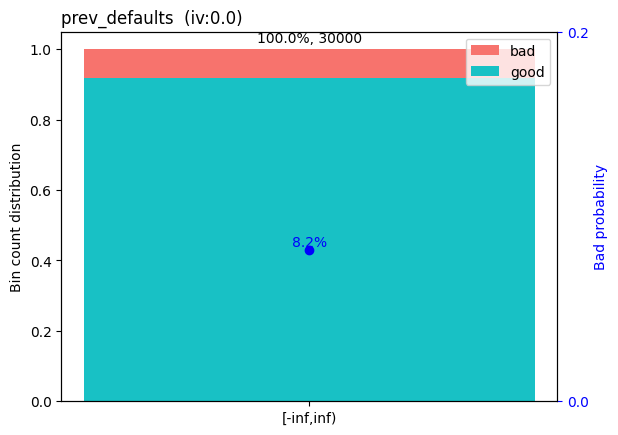

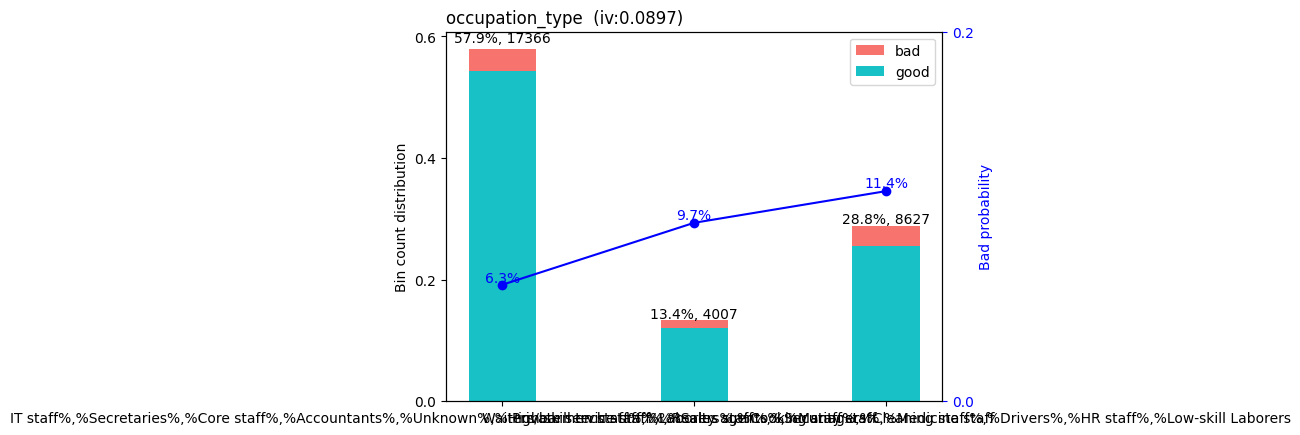

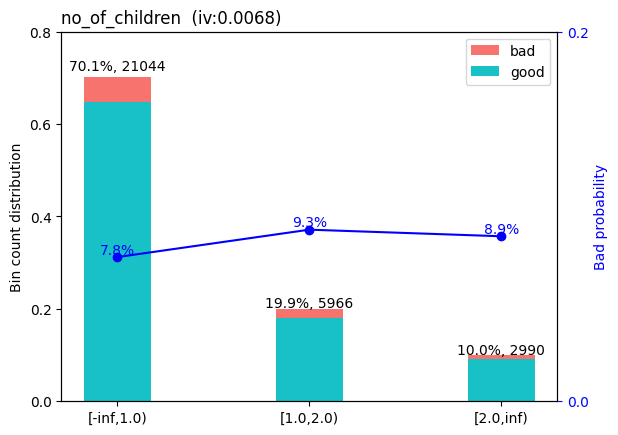

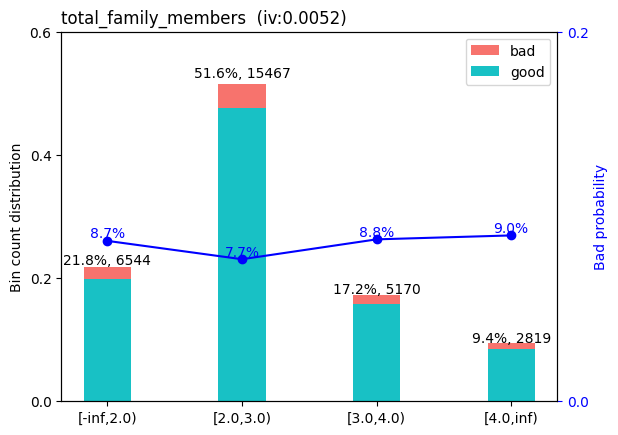

In [157]:
# woe binning ------
bins = sc.woebin(df.drop(columns = ["customer_id", "name"]), y="credit_card_default")
sc.woebin_plot(bins)

In [158]:
# converting train and test into woe values
train_woe = sc.woebin_ply(df, bins)
train_woe.drop(columns = ["customer_id", "name"], inplace = True)
train_woe.head(10)

[INFO] converting into woe values ...


,credit_card_default,credit_score_woe,owns_house_woe,age_woe,net_yearly_income_woe,default_in_last_6months_woe,migrant_worker_woe,credit_limit_woe,no_of_days_employed_woe,owns_car_woe,credit_limit_used(%)_woe,prev_defaults_woe,gender_woe,occupation_type_woe,yearly_debt_payments_woe,no_of_children_woe,total_family_members_woe
34126,0,-2.851316,-0.005566,-0.004599,-0.132349,0.0,-0.055429,0.019562,-0.537050,0.046332,-2.518964,0.0,-0.175009,-0.284480,-0.193449,-0.055311,0.060765
44609,0,-2.851316,-0.005566,-0.024660,0.089601,0.0,-0.055429,0.019562,-0.537050,0.046332,-2.518964,0.0,-0.175009,-0.284480,0.130535,-0.055311,-0.071457
44264,1,0.286341,-0.005566,-0.202448,0.089601,0.0,-0.055429,0.019562,-0.537050,0.046332,1.195478,0.0,-0.175009,-0.284480,0.130535,-0.055311,-0.071457
33556,0,-2.851316,-0.005566,0.052665,0.015976,0.0,-0.055429,0.019562,0.104234,-0.097689,-2.518964,0.0,-0.175009,-0.284480,-0.196714,0.134941,0.071114
28050,0,-2.851316,-0.005566,0.044954,0.089601,0.0,-0.055429,-0.148197,-0.537050,-0.097689,-2.518964,0.0,0.278268,-0.284480,-0.196714,-0.055311,-0.071457
4448,0,-2.851316,-0.005566,-0.202448,0.089601,0.0,-0.055429,0.058156,0.104234,0.046332,-2.518964,0.0,0.278268,0.360785,-0.193449,0.091910,0.097436
15054,0,-2.851316,0.012659,-0.024660,0.089601,0.0,-0.055429,-0.148197,0.104234,0.046332,-2.518964,0.0,0.278268,-0.284480,-0.196714,-0.055311,0.060765
26095,0,-2.851316,-0.005566,0.052665,0.089601,0.0,-0.055429,0.058156,0.104234,-0.097689,-2.518964,0.0,-0.175009,-0.284480,0.130535,0.091910,0.097436
2593,0,-2.851316,-0.005566,0.052665,0.089601,0.0,-0.055429,0.058156,0.376652,0.046332,-2.518964,0.0,-0.175009,0.360785,0.130535,0.134941,-0.071457
297,0,-2.851316,-0.005566,-0.024660,0.015976,0.0,-0.055429,0.146722,-0.537050,0.046332,-2.518964,0.0,-0.175009,-0.284480,0.130535,0.134941,0.071114


In [159]:
# dropping text columns that aren't necessary like 'customer_id' and 'name'
old_df = df.copy()

df.drop(['customer_id', 'name'], axis=1, inplace=True)
df.drop(low_IV_cols, axis=1, inplace=True)
df.head()

,gender,no_of_days_employed,occupation_type,credit_limit_used(%),credit_score,default_in_last_6months,credit_card_default
34126,F,4181.0,Unknown,23,807.0,0,0
44609,F,365250.0,Unknown,60,858.0,0,0
44264,F,365241.0,Unknown,81,667.0,0,1
33556,F,1882.0,Managers,32,690.0,0,0
28050,M,365244.0,Unknown,65,721.0,0,0


## Encoding

In [160]:
df["gender"] = df["gender"].apply(lambda x : 1 if x == "F" else 0)
#df["owns_car"] = df["owns_car"].apply(lambda x : 1 if x == "Y" else 0)
#df["owns_house"] = df["owns_house"].apply(lambda x : 1 if x == "Y" else 0)

In [161]:
occupation_type_encoded_df = pd.get_dummies(df["occupation_type"], prefix= "occupation")
df = pd.concat([df, occupation_type_encoded_df], axis=1)
df.drop(columns=["occupation_type"], inplace=True)
df.head()

,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,credit_card_default,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
34126,1,4181.0,23,807.0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
44609,1,365250.0,60,858.0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
44264,1,365241.0,81,667.0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
33556,1,1882.0,32,690.0,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
28050,0,365244.0,65,721.0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


## Split dataset

In [162]:
# split train-test data
X = df.drop(['credit_card_default'], axis=1)
y = df['credit_card_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("X=",X_train.shape, X_test.shape)
print("y=",y_train.shape, y_test.shape)

X= (21000, 24) (9000, 24)
y= (21000,) (9000,)


In [163]:
X_train.head()

,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
26658,1,365246.0,96,922.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5389,1,1206.0,16,711.0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8704,1,4040.0,18,761.0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
37747,0,96.0,51,854.0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
27346,0,5326.0,92,700.0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [164]:
y_train

,credit_card_default
26658,0
5389,0
8704,0
37747,0
27346,0
...,...
34093,0
823,0
32715,0
14006,0


In [165]:
# WOE data
X_woe = train_woe.drop(['credit_card_default'], axis=1)
y_woe = train_woe['credit_card_default']

X_train_woe, X_test_woe, y_train_woe, y_test_woe = train_test_split(X_woe, y_woe, test_size=0.3, stratify=y_woe, random_state=42)

print("X=",X_train_woe.shape, X_test_woe.shape)
print("y=",y_train_woe.shape, y_test_woe.shape)

X= (21000, 16) (9000, 16)
y= (21000,) (9000,)


In [166]:
X_train_woe.head()

,credit_score_woe,owns_house_woe,age_woe,net_yearly_income_woe,default_in_last_6months_woe,migrant_worker_woe,credit_limit_woe,no_of_days_employed_woe,owns_car_woe,credit_limit_used(%)_woe,prev_defaults_woe,gender_woe,occupation_type_woe,yearly_debt_payments_woe,no_of_children_woe,total_family_members_woe
26658,-2.851316,-0.005566,0.052665,0.015976,0.0,-0.055429,0.146722,-0.537050,0.046332,1.268081,0.0,-0.175009,-0.284480,-0.193449,-0.055311,-0.071457
5389,-2.851316,-0.005566,0.044954,-0.128576,0.0,0.226851,0.058156,0.104234,0.046332,-2.518964,0.0,-0.175009,0.360785,0.130535,0.134941,0.071114
8704,-2.851316,-0.005566,0.104362,0.089601,0.0,-0.055429,0.019562,-0.537050,0.046332,-2.518964,0.0,-0.175009,-0.284480,-0.193449,0.134941,0.071114
37747,-2.851316,-0.005566,-0.123203,0.015976,0.0,-0.055429,0.019562,0.376652,-0.097689,-2.518964,0.0,0.278268,-0.284480,-0.196714,-0.055311,0.060765
27346,-2.851316,0.012659,0.052665,0.089601,0.0,-0.055429,0.146722,-0.537050,0.046332,1.268081,0.0,0.278268,0.360785,0.130535,-0.055311,-0.071457


In [167]:
y_woe

,credit_card_default
34126,0
44609,0
44264,1
33556,0
28050,0
...,...
37523,0
36228,0
32772,0
9762,0


## Scaling data

In [168]:
# scaling the features to standardize
scaler = MinMaxScaler()

cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

## Data Imbalancing Handling

In [169]:
# initialize SMOTE method
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [170]:
print("Dimension of X_train_sm Shape:", X_train.shape)
print("Dimension of y_train_sm Shape:", y_train.shape)

Dimension of X_train_sm Shape: (38552, 24)
Dimension of y_train_sm Shape: (38552,)


In [171]:
X_train = pd.DataFrame(data=X_train, columns=cols)
print("X_train.shape:",X_train.shape)
y_train = pd.Series(y_train)
print("y_train.shape:",y_train.shape)
X_train.head()

X_train.shape: (38552, 24)
y_train.shape: (38552,)


,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
0,1.0,0.999984,0.969697,0.939866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.003296,0.161616,0.469933,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.011055,0.181818,0.581292,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000257,0.515152,0.788419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014576,0.929293,0.445434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
y_train.value_counts(normalize=True)

,proportion
credit_card_default,
0,0.5
1,0.5


# Using Logit model in credit scoring:

## Run the logit model for the train set for the initial data

In [173]:
from statsmodels.discrete.discrete_model import Logit
logit = Logit(y_train, X_train)
logit_fit = logit.fit()

         Current function value: 0.098695
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [174]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     credit_card_default   No. Observations:                38552
Model:                           Logit   Df Residuals:                    38528
Method:                            MLE   Df Model:                           23
Date:                 Sun, 17 Nov 2024   Pseudo R-squ.:                  0.8576
Time:                         07:37:15   Log-Likelihood:                -3804.9
converged:                       False   LL-Null:                       -26722.
Covariance Type:             nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
gender                              -0.1955      0.072     -2.731      0.006      -0.336      -0.055
no_of_days_employed                 -0.3089      0.115     -2.676      0.007      -0.535      -0.083
credit_limit_used(%)                 9.2967      0.219     42.504      0.000       8.868       9.725
credit_score                       -26.3302      0.615    -42.825      0.000     -27.535     -25.125
default_in_last_6months            216.5010   1.34e+04      0.016      0.987   -2.61e+04    2.65e+04
occupation_Accountants               3.8706      0.315     12.299      0.000       3.254       4.487
occupation_Cleaning staff            4.3175      0.348     12.407      0.000       3.635       5.000
occupation_Cooking staff             4.5699      0.331     13.791      0.000       3.920       5.219
occupation_Core staff                4.1222      0.286     14.414      0.000       3.562       4.683
occupation_Drivers                   4.1146      0.283     14.552      0.000       3.560       4.669
occupation_HR staff                  1.1312      1.233      0.918      0.359      -1.285       3.547
occupation_High skill tech staff     2.8968      0.318      9.113      0.000       2.274       3.520
occupation_IT staff                 -3.2122      3.654     -0.879      0.379     -10.374       3.949
occupation_Laborers                  3.9506      0.271     14.559      0.000       3.419       4.482
occupation_Low-skill Laborers        3.9416      0.412      9.569      0.000       3.134       4.749
occupation_Managers                  3.5844      0.290     12.379      0.000       3.017       4.152
occupation_Medicine staff            3.4496      0.333     10.346      0.000       2.796       4.103
occupation_Private service staff     2.4504      0.430      5.695      0.000       1.607       3.294
occupation_Realty agents             2.4885      0.792      3.143      0.002       0.937       4.040
occupation_Sales staff               3.9199      0.280     14.009      0.000       3.371       4.468
occupation_Secretaries               2.2090      0.592      3.729      0.000       1.048       3.370
occupation_Security staff            3.0221      0.347      8.710      0.000       2.342       3.702
occupation_Unknown                   3.5768      0.276     12.957      0.000       3.036       4.118
occupation_Waiters/barmen staff      5.1816      0.430     12.037      0.000       4.338       6.025
====================================================================================================

Possibly complete quasi-separation: A fraction 0.61 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Run the logit model for the train set for the data using WOE

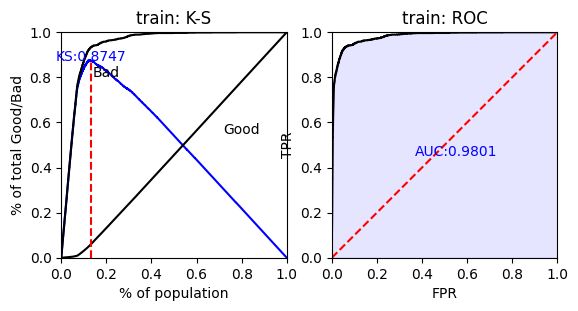

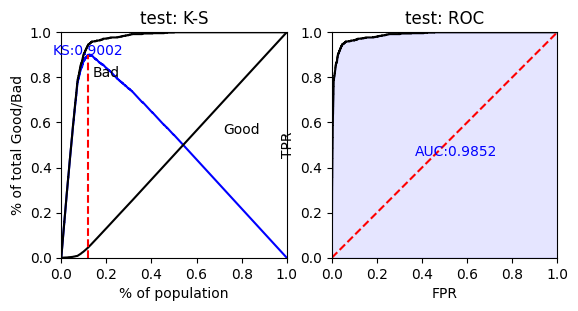

/usr/local/lib/python3.10/dist-packages/scorecardpy/scorecard.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_score.loc[:,'score'] = card_basepoints + dat_score.sum(axis=1)


In [175]:
# logistic regression ------
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train_woe, y_train_woe)
# lr.coef_
# lr.intercept_

# predicted proability
train_pred = lr.predict_proba(X_train_woe)[:,1]
test_pred = lr.predict_proba(X_test_woe)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train_woe, train_pred, title = "train")
test_perf = sc.perf_eva(y_test_woe, test_pred, title = "test")

# score ------
card = sc.scorecard(bins, lr, X_train_woe.columns)
# credit score
score = sc.scorecard_ply(old_df, card, only_total_score=False, print_step=0, replace_blank_na=True, var_kp = None)
#test_score = sc.scorecard_ply(test_woe, card, print_step=0)

In [176]:
score

,credit_score_points,age_points,net_yearly_income_points,migrant_worker_points,credit_limit_points,no_of_days_employed_points,owns_car_points,credit_limit_used(%)_points,gender_points,occupation_type_points,yearly_debt_payments_points,score
34126,201.0,0.0,1.0,1.0,-2.0,34.0,-6.0,177.0,10.0,7.0,15.0,997.0
44609,201.0,1.0,-1.0,1.0,-2.0,34.0,-6.0,177.0,10.0,7.0,-10.0,971.0
44264,-20.0,9.0,-1.0,1.0,-2.0,34.0,-6.0,-84.0,10.0,7.0,-10.0,497.0
33556,201.0,-2.0,-0.0,1.0,-2.0,-7.0,13.0,177.0,10.0,7.0,15.0,972.0
28050,201.0,-2.0,-1.0,1.0,12.0,34.0,13.0,177.0,-15.0,7.0,15.0,1001.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37523,201.0,1.0,-1.0,1.0,-2.0,34.0,-6.0,177.0,10.0,7.0,-10.0,971.0
36228,201.0,1.0,-1.0,1.0,-5.0,-24.0,-6.0,177.0,10.0,-9.0,-10.0,894.0
32772,201.0,0.0,-0.0,1.0,-2.0,-7.0,-6.0,177.0,10.0,-4.0,15.0,944.0
9762,201.0,1.0,-1.0,1.0,-2.0,-24.0,-6.0,177.0,-15.0,-9.0,-10.0,872.0


(array([ 1471.,   661.,   407.,  1201.,   447.,  5736.,  2845.,   937.,
        13188.,  3107.]),
 array([ 167. ,  257.4,  347.8,  438.2,  528.6,  619. ,  709.4,  799.8,
         890.2,  980.6, 1071. ]),
 <BarContainer object of 10 artists>)

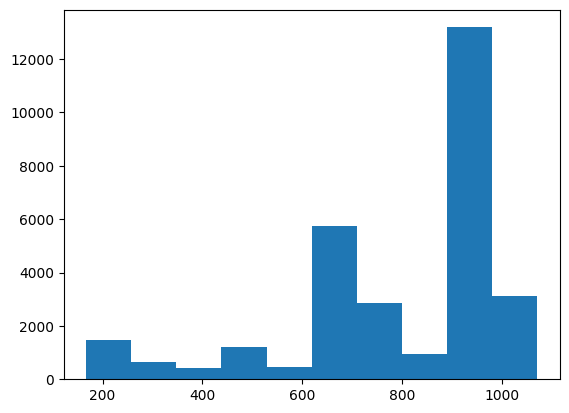

In [177]:
plt.hist(score["score"])

# Using Different Models for Credit Risk Analysis

In [178]:
# evaluation function
def evaluation(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("="*50)

    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("Accuracy of TRAIN data:", 100*accuracy_score(y_train, y_train_pred))
    print("F1_Score of TRAIN data:", 100*f1_score(y_train, y_train_pred, average="macro"))
    print("="*50)

    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print("Accuracy of TEST data:", 100*accuracy_score(y_test, y_test_pred))
    print("F1_Score of TEST data:", 100*f1_score(y_test, y_test_pred, average="macro"))
    print("="*50)

    # calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE: ", rmse)

    # calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_test_pred, average=None)
    print("ROC AUC score: ", roc_auc)


In [179]:
y_test

,credit_card_default
11858,0
22651,0
38925,0
2917,0
18012,0
...,...
37539,0
17978,1
5227,0
3994,0


## Logisitc Regression

In [180]:
# initialize LogisticRegression and fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [181]:
# prediction
evaluation(logreg)

[[18245  1031]
 [  611 18665]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     19276
           1       0.95      0.97      0.96     19276

    accuracy                           0.96     38552
   macro avg       0.96      0.96      0.96     38552
weighted avg       0.96      0.96      0.96     38552

Accuracy of TRAIN data: 95.74081759701183
F1_Score of TRAIN data: 95.74031202556064
[[7800  461]
 [  19  720]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      8261
           1       0.61      0.97      0.75       739

    accuracy                           0.95      9000
   macro avg       0.80      0.96      0.86      9000
weighted avg       0.97      0.95      0.95      9000

Accuracy of TEST data: 94.66666666666667
F1_Score of TEST data: 86.00746268656717
RMSE:  0.23094010767585033
ROC AUC score:  0.9592425992390677


## Decision Tree

In [182]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [183]:
# prediction
evaluation(tree_model)

[[19276     0]
 [    0 19276]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19276
           1       1.00      1.00      1.00     19276

    accuracy                           1.00     38552
   macro avg       1.00      1.00      1.00     38552
weighted avg       1.00      1.00      1.00     38552

Accuracy of TRAIN data: 100.0
F1_Score of TRAIN data: 100.0
[[8045  216]
 [  89  650]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.75      0.88      0.81       739

    accuracy                           0.97      9000
   macro avg       0.87      0.93      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.61111111111111
F1_Score of TEST data: 89.56828073295652
RMSE:  0.18408935028645435
ROC AUC score:  0.9267100134171373


## Random Forest

In [184]:
regr_rfr = RandomForestClassifier(random_state=42, oob_score=True)
regr_rfr.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [185]:
# prediction
evaluation(regr_rfr)

[[19276     0]
 [    0 19276]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19276
           1       1.00      1.00      1.00     19276

    accuracy                           1.00     38552
   macro avg       1.00      1.00      1.00     38552
weighted avg       1.00      1.00      1.00     38552

Accuracy of TRAIN data: 100.0
F1_Score of TRAIN data: 100.0
[[8016  245]
 [  70  669]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.73      0.91      0.81       739

    accuracy                           0.96      9000
   macro avg       0.86      0.94      0.90      9000
weighted avg       0.97      0.96      0.97      9000

Accuracy of TEST data: 96.5
F1_Score of TEST data: 89.50838979096383
RMSE:  0.18708286933869708
ROC AUC score:  0.9378099877163822


## CatBoost

In [186]:
reg_catb = CatBoostClassifier(random_seed=42)
reg_catb.fit(X_train, y_train)

Learning rate set to 0.048998
0:	learn: 0.5821771	total: 12.5ms	remaining: 12.5s
1:	learn: 0.4555877	total: 23.7ms	remaining: 11.8s
2:	learn: 0.3595329	total: 34.1ms	remaining: 11.3s
3:	learn: 0.3106778	total: 44.6ms	remaining: 11.1s
4:	learn: 0.2697028	total: 55.5ms	remaining: 11s
5:	learn: 0.2387671	total: 65.9ms	remaining: 10.9s
6:	learn: 0.1946606	total: 76.8ms	remaining: 10.9s
7:	learn: 0.1764063	total: 88.5ms	remaining: 11s
8:	learn: 0.1538568	total: 99.3ms	remaining: 10.9s
9:	learn: 0.1413217	total: 110ms	remaining: 10.9s
10:	learn: 0.1257602	total: 124ms	remaining: 11.2s
11:	learn: 0.1140674	total: 135ms	remaining: 11.1s
12:	learn: 0.1040013	total: 146ms	remaining: 11.1s
13:	learn: 0.0966850	total: 159ms	remaining: 11.2s
14:	learn: 0.0912453	total: 170ms	remaining: 11.1s
15:	learn: 0.0879684	total: 181ms	remaining: 11.1s
16:	learn: 0.0846554	total: 195ms	remaining: 11.3s
17:	learn: 0.0829257	total: 207ms	remaining: 11.3s
18:	learn: 0.0805997	total: 217ms	remaining: 11.2s
19:	le

In [187]:
# prediction
evaluation(reg_catb)

[[19064   212]
 [   25 19251]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19276
           1       0.99      1.00      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 99.38524590163934
F1_Score of TRAIN data: 99.38523143721889
[[8052  209]
 [  80  659]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.76      0.89      0.82       739

    accuracy                           0.97      9000
   macro avg       0.87      0.93      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.78888888888889
F1_Score of TEST data: 90.12661580817256
RMSE:  0.17919573407620817
ROC AUC score:  0.9332230008162323


## XGBoost

In [188]:
xgb_model = XGBClassifier(random_seed=42)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "random_seed" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_seed=42, ...)

In [189]:
# prediction
evaluation(xgb_model)

[[19083   193]
 [   29 19247]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19276
           1       0.99      1.00      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 99.42415438887735
F1_Score of TRAIN data: 99.4241439679159
[[8052  209]
 [  67  672]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.76      0.91      0.83       739

    accuracy                           0.97      9000
   macro avg       0.88      0.94      0.91      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.93333333333334
F1_Score of TEST data: 90.63899063899063
RMSE:  0.17511900715418263
ROC AUC score:  0.9420186706403191


In [190]:
xgb_model.feature_importances_

array([0.00966907, 0.01233548, 0.1201108 , 0.6450812 , 0.01976914,
       0.00946563, 0.01272448, 0.00868787, 0.01251401, 0.01120354,
       0.        , 0.01693622, 0.        , 0.01113195, 0.00629321,
       0.00956578, 0.00670754, 0.02435966, 0.00187226, 0.01549326,
       0.02041987, 0.00571754, 0.01331052, 0.00663097], dtype=float32)

In [191]:
from xgboost import plot_importance

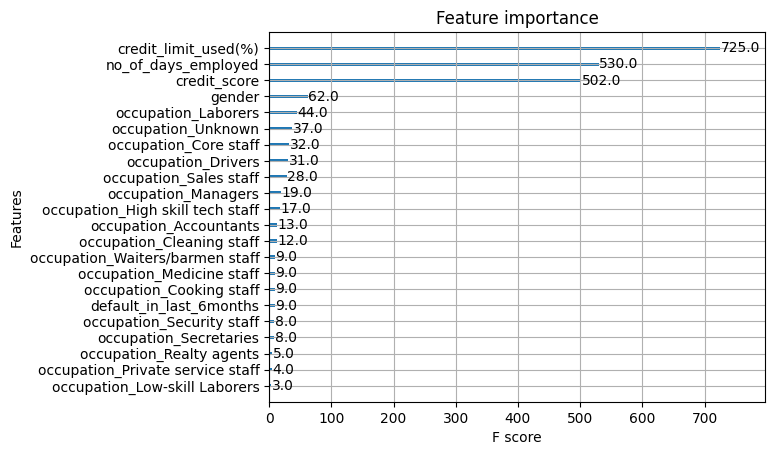

<Figure size 640x480 with 0 Axes>

In [192]:
plot_importance(xgb_model)
plt.show()
plt.savefig("Feature importance.png")

## LightGBM

In [193]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19276, number of negative: 19276
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 38552, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

In [194]:
# prediction
evaluation(lgbm_model)

[[18968   308]
 [   35 19241]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19276
           1       0.98      1.00      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 99.11029259182403
F1_Score of TRAIN data: 99.11024797481507
[[8024  237]
 [  62  677]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.74      0.92      0.82       739

    accuracy                           0.97      9000
   macro avg       0.87      0.94      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.67777777777778
F1_Score of TEST data: 90.0412969761847
RMSE:  0.18226964152656422
ROC AUC score:  0.9437069104891351


## KNN

In [195]:
# # iterating knn model for all values of k from 1-39
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

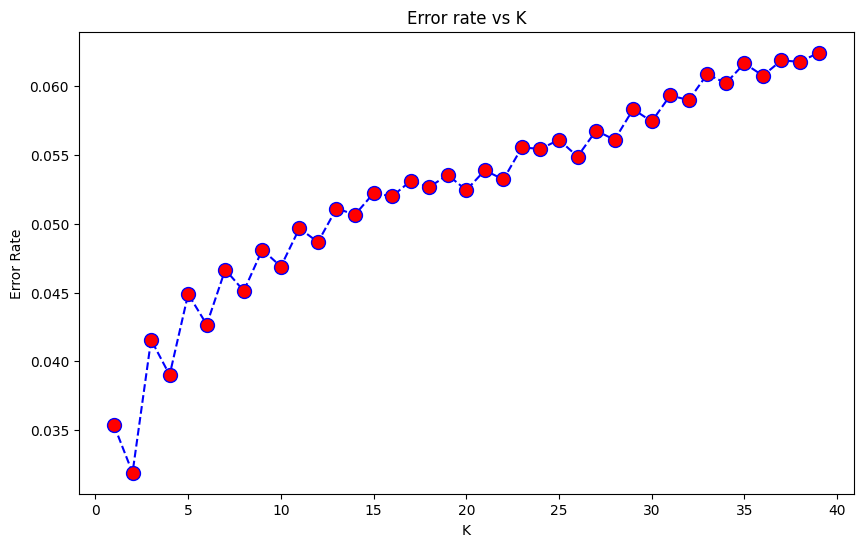

In [196]:
# ploting the error_rate

plt.figure(figsize=[10,6])
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed',
          marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

Choose k = 2

In [197]:
# # building knn and fit the model
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [198]:
# # Evaluation
evaluation(knn)

[[19276     0]
 [  243 19033]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19276
           1       1.00      0.99      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 99.36968250674414
F1_Score of TRAIN data: 99.36965746322618
[[8066  195]
 [  92  647]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8261
           1       0.77      0.88      0.82       739

    accuracy                           0.97      9000
   macro avg       0.88      0.93      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.81111111111112
F1_Score of TEST data: 90.04947870709792
RMSE:  0.17857460314638499
ROC AUC score:  0.9259512760203765


Our analysis reveals that most of the model performed reasonably well however XGBoost outperforms other models achieving Accuracy value 96.93%, F1 Score
value 90.64%, ROC AUC Score 0.9420.

We identified the key variables influencing credit card defaults to be credit score, credit limit utilization, and the number of days employed. Notably, borrower age did not prove to be a significant predictor of defaults, highlighting the importance of exploring alternative factors in credit risk evaluation.

This study provides important insights for financial institutions looking to improve their credit risk analysis models. By utilizing advanced machine learning techniques such as XGBoost, these institutions can enhance their ability to identify and manage credit risk, ultimately minimizing potential losses from defaults.